In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
import pathlib
import seaborn as sns
from keras.models import Sequential 
from keras.applications import ResNet50
from keras.layers import Dense,GlobalAveragePooling2D

In [3]:
dataset = pathlib.Path("lung_colon_image_set/")
images = list(dataset.glob('*/*/*.jpeg'))

In [4]:
print(f"Length Of Images : {len(images)}")


Length Of Images : 20000


In [5]:
lbt = dataset.glob('lung_image_sets/lung_n/*')
laca = dataset.glob('lung_image_sets/lung_aca/*')
lscc = dataset.glob('lung_image_sets/lung_scc/*')
cacc = dataset.glob('colon_image_sets/colon_aca/*')
cbt = dataset.glob('colon_image_sets/colon_n/*')

In [6]:
lung_benign_tissue = list(lbt)
lung_adenocarcinoma = list(laca)
lung_squamous_cell_carcinoma = list(lscc)
colon_adenocarcinoma = list(cacc)
colon_benign_tissue = list(cbt)

c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

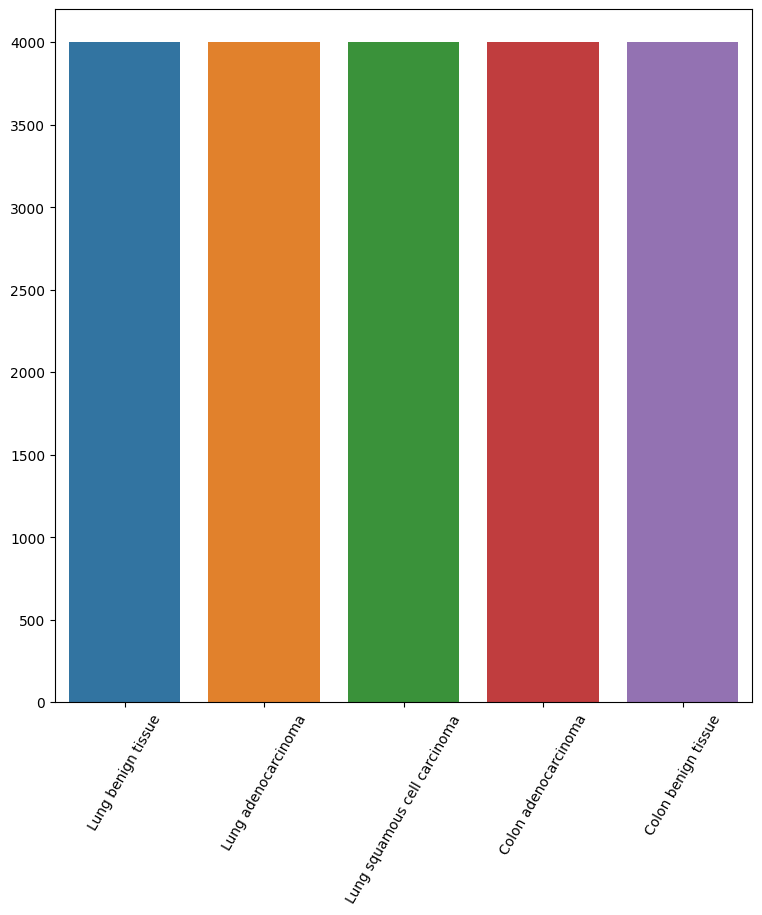

In [7]:
x = ['Lung benign tissue','Lung adenocarcinoma','Lung squamous cell carcinoma','Colon adenocarcinoma','Colon benign tissue']
y = [len(lung_benign_tissue),len(lung_adenocarcinoma),len(lung_squamous_cell_carcinoma),len(colon_adenocarcinoma),len(colon_benign_tissue)]

plt.figure(figsize=(9,9))
sns.barplot(x=x,y=y)
plt.xticks(rotation = 60)
plt.show()

In [8]:
# plt.figure(figsize=(20,20))

# plt.subplot(1,5,1)
# img1 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_aca/lungaca1.jpeg')
# plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  
# plt.axis('off') 
# plt.title('lung_adenocarcinoma')

# plt.subplot(1,5,2)
# img2 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_n/lungn1000.jpeg')
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('lung_benign_tissue')

# plt.subplot(1,5,3)
# img3 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_scc/lungscc1010.jpeg')
# plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('lung_squamous_cell_carcinoma')

# plt.subplot(1,5,4)
# img4 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_aca/colonca1436.jpeg')
# plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('colon_adenocarcinoma')

# plt.subplot(1,5,5)
# img2 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_n/colonn1001.jpeg')
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.title('colon_benign_tissue')

# plt.show()

In [9]:
label_dict = {
    'lung_benign_tissue' : 0,
    'lung_adenocarcinoma' : 1,
    'lung_squamous_cell_carcinoma' : 2,
    'colon_adenocarcinoma' : 3,
    'colon_benign_tissue' : 4
}

image_dict = {
    'lung_benign_tissue' : lung_benign_tissue,
    'lung_adenocarcinoma' : lung_adenocarcinoma,
    'lung_squamous_cell_carcinoma' : lung_squamous_cell_carcinoma,
    'colon_adenocarcinoma' : colon_adenocarcinoma,
    'colon_benign_tissue' :colon_benign_tissue
}

In [10]:
x,y = [],[]

for name,images in image_dict.items():
    for img in images:
        i = cv2.imread(str(img))
        resized_image = cv2.resize(i,(229,229))
        x.append(resized_image)
        y.append(label_dict[name])

x = np.array(x)
y = np.array(y)


Train Test Split of the data


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=100)

print("Number of training data : ",len(x_train))
print("Number of testing data : ",len(x_test))
print("Number of validation data : ",len(x_val))



Number of training data :  16000
Number of testing data :  2000
Number of validation data :  2000


In [12]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)



In [13]:
model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False,pooling='avg',input_shape=(229,229,3)))
model.add(Dense(5, activation='softmax'))
model.layers[0].trainable=False             
model.summary()
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23597957 (90.02 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [22]:
history = model.fit(x_train,y_train_cat,epochs = 10,validation_data=(x_val,y_val_cat),batch_size=16)

Epoch 1/10
1000/1000 [==============================] - 1283s 1s/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0176 - val_accuracy: 0.9940
Epoch 2/10
1000/1000 [==============================] - 1251s 1s/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0194 - val_accuracy: 0.9930
Epoch 3/10
1000/1000 [==============================] - 1206s 1s/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 4/10
1000/1000 [==============================] - 1205s 1s/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.0219 - val_accuracy: 0.9920
Epoch 5/10
1000/1000 [==============================] - 1197s 1s/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0411 - val_accuracy: 0.9825
Epoch 6/10
1000/1000 [==============================] - 1196s 1s/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0202 - val_accuracy: 0.9940
Epoch 7/10
1000/1000 [==============================] - 1199s 1s/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0197 -

In [15]:
model.save('resnet.h5')

c:\Users\abi\Desktop\abijith\DeepLearning\DL\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
y_test_cat = to_categorical(y_test,num_classes=5)
model.evaluate(x_test,y_test_cat)

63/63 [==============================] - 133s 2s/step - loss: 0.0353 - accuracy: 0.9875


[0.035347793251276016, 0.987500011920929]

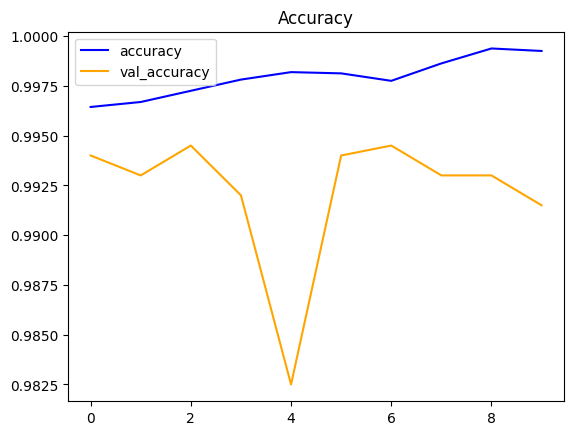

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('accuracy.png')

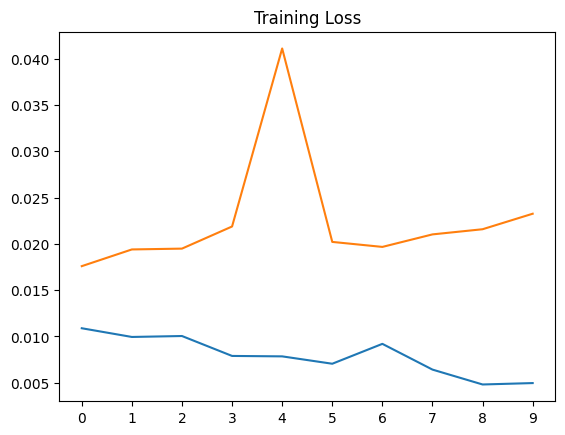

<Figure size 640x480 with 0 Axes>

In [26]:
x=list(range(0,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(x)
plt.title("Training Loss")
plt.show()
plt.savefig("loss.png")